In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classify_fault.fault_detection import *
from classify_fault.set_config import *

In [2]:
import random

# 정상적인 주기의 시계열 데이터 (100개의 데이터)
data1 = np.array([np.sin(2 * np.pi * i / 10) for i in range(100)])

# 동결 고장 예시: 정상 데이터의 형태를 보이다가 40번째 인덱스 부터 동결되는 데이터
data2 = np.array([np.sin(2 * np.pi * i / 10) if i < 40 else data1[39] for i in range(100)])

# 드리프트 고장 예시: 정상 데이터의 형태를 보이다가 50번째 인덱스 부터 서서히 값이 증가하는 데이터
data3 = np.array([np.sin(2 * np.pi * i / 10) + (i - 50) * 0.1 if i >= 50 else np.sin(2 * np.pi * i / 10) for i in range(100)])

# 경계 값 고장 예시: 정상 데이터의 형태를 보이다가 무작위 인덱스에 경계를 초과하는 데이터
data4 = np.array([np.sin(2 * np.pi * i / 10) for i in range(100)])
out_of_bounds_idx = random.sample(range(0, 100), 5)
for idx in out_of_bounds_idx:
    data4[idx] = 2 if data4[idx] < 0 else -2

datasets = [data1, data2, data3, data4]

In [3]:

frozen_threshold = 0.01
n = 3
boundary_limits = (1.5, -1.5)
dynamic_threshold = 1.2
drift_params = {"average": 0, "cusum_threshold": 4.0, "ewma_alpha": 0.5}

Scenario 1:


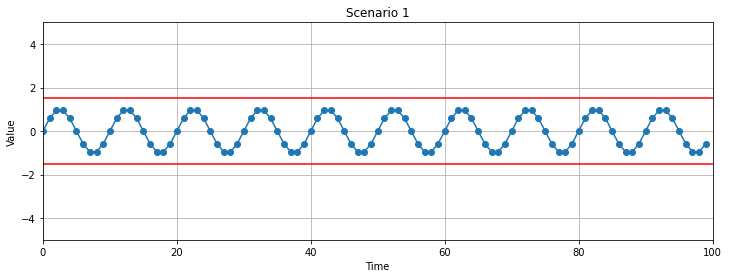

Scenario 2:


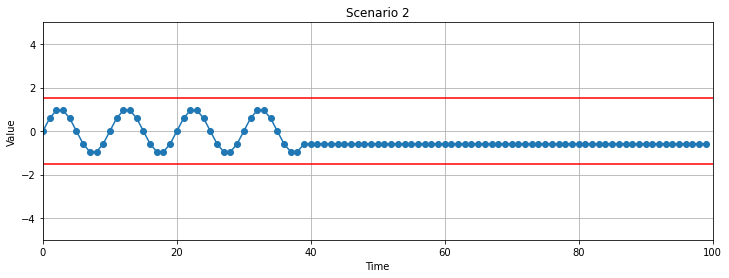

Fault detected at index 41
 {'success': True, 'fault_detected': True, 'Frozen': True, 'Boundary': False, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 42
 {'success': True, 'fault_detected': True, 'Frozen': True, 'Boundary': False, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 43
 {'success': True, 'fault_detected': True, 'Frozen': True, 'Boundary': False, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 44
 {'success': True, 'fault_detected': True, 'Frozen': True, 'Boundary': False, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 45
 {'success': True, 'fault_detected': True, 'Frozen': True, 'Boundary': False, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 46
 {'success': True, 'fault_detected': True, 'Frozen': True, 'Boundary': False, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 47
 {'success': True, 'fault_detec

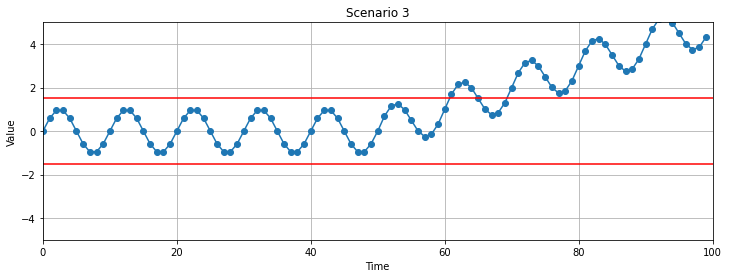

Fault detected at index 61
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 62
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 63
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 64
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 65
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 70
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 71
 {'success': True, 'fault_detec

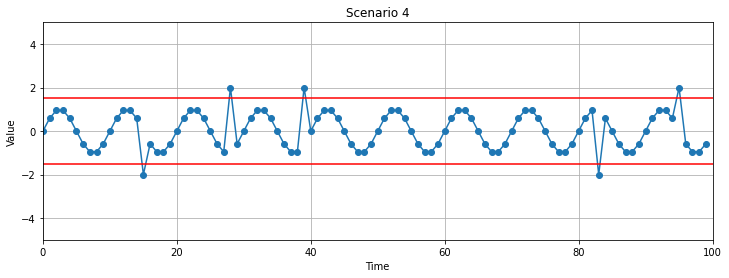

Fault detected at index 15
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': False, 'Drift': False, 'message': '-'}

Fault detected at index 16
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': False, 'Dynamics': True, 'Drift': False, 'message': '-'}

Fault detected at index 17
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': False, 'Dynamics': True, 'Drift': False, 'message': '-'}

Fault detected at index 28
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': True, 'Dynamics': True, 'Drift': False, 'message': '-'}

Fault detected at index 29
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': False, 'Dynamics': True, 'Drift': False, 'message': '-'}

Fault detected at index 30
 {'success': True, 'fault_detected': True, 'Frozen': False, 'Boundary': False, 'Dynamics': True, 'Drift': False, 'message': '-'}

Fault detected at index 31
 {'success': True, 'fault_detect

In [4]:
for idx, data in enumerate(datasets, start=1):
    print(f"Scenario {idx}:")
    
    # 데이터 그래프 그리기
    plt.figure(figsize=(12, 4))
    plt.plot(data, linestyle='-', marker='o')
    plt.title(f"Scenario {idx}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.axhline(boundary_limits[0], c='r')
    plt.axhline(boundary_limits[1], c='r')
    plt.ylim(-5, 5)
    plt.xlim(0, len(data))
    plt.grid()
    plt.show()
    

    type_to_check = {
        "frozen": True,
        "boundary": True,
        "dynamics": True,
        "drift": True
    }

    for i in range(n, len(data)):
        recent_data = data[i-n:i+1]
        fault_detected = detect_fault(recent_data, n, type_to_check, frozen_threshold, boundary_limits, dynamic_threshold, drift_params)
        if fault_detected['fault_detected']:
            print(f"Fault detected at index {i}\n {fault_detected}\n")